# Лабораторная работа 5
## Полиномы. НОД. Расширенный алгоритм Евклида (Wolfram)

1. Реализовать расширенный алгоритм Евклида.
2. Рассчитать НОД, сравнить его с результатом функции gcd().
3. Получить представление НОД в виде $u * f + v * g$ (тождество Безу).


* Расширенный алгоритм Евклида возвращать должен 3 значения.
* Должна быть работа с коэффициентами(нормализация полиномов).
* Должны быть составлены условия для проверки:
	1. что ваш НОД = f*u + g*v
	2. что ваш НОД идентичен НОД от wolfram (при условии нормализации результатов)

Вариант 1.  
$f = x^4 - 4x^3 + 7x^2 - 5x + 1$  
$g = x^5 - x^4 - x^3 + x^2 + 5x - 5$

In [1]:
f := x^4 - 4*x^3 + 7*x^2 - 5*x + 1
g := x^5 - x^4 - x^3 + x^2 + 5*x - 5

In [3]:
f

2      3    4
1 - 5 x + 7 x  - 4 x  + x

In [4]:
g

2    3    4    5
-5 + 5 x + x  - x  - x  + x

Для начала рассчитаем НОД при помощи встроенной функции GCD.

In [5]:
GCDAuto = PolynomialGCD[f,g]

-1 + x

### Расширенный алгоритм Евклида. Тождество Безу.

In [6]:
(*Функция принимает два полинома. Возвращает тройку полиномов (НОД, u, v), где u, v - коэффициенты разложения Безу*)
ExtEuclid[aa_, bb_] := Module[
    {a = aa, b = bb,
    u = 1, u1 = 0,
    v = 0, v1 = 1,
    quot, rem
    },
    
    While[Not[SameQ[b, 0]],
        quot = PolynomialQuotient[a, b, x];
        rem = PolynomialRemainder[a, b, x];
        {a, b} = {b, rem};
        {u, u1} = {u1, (u - u1*quot)//ExpandAll};
        {v, v1} = {v1, (v - v1*quot)//ExpandAll};

    ];
    {a, u, v} (*a - НОД *)
];

1936    1936 x
GCD = (-(----) + ------)
         441      441
                         2       3
     1264   656 x   128 x    16 x
u = (---- + ----- - ------ - -----)
     441     441     441      21
                       2
     640   880 x   16 x
v = (--- - ----- + -----)
     441    441     21
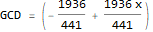
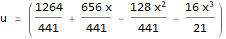
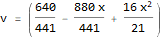

In [8]:
{GCDEuclid, u, v} = ExtEuclid[f, g];
"GCD =" GCDEuclid
"u =" u
"v =" v

Нормируем полученные многочлены для последующей работы с ними. Для этого найдем старший коэффициент многочлена GCDEuclid.

1936
----
441
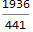

In [12]:
coef = CoefficientList[GCDEuclid, x]//Last

Поделим все многочлены на найденный коэффициент.

-1 + x
                2       3
79    41 x   8 x    21 x
--- + ---- - ---- - -----
121   121    121     121
                2
40    5 x   21 x
--- - --- + -----
121   11     121
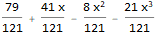
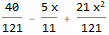

In [13]:
GCDEuclidNorm = (GCDEuclid / coef)//ExpandAll
uNorm = (u / coef)//ExpandAll
vNorm = (v / coef)//ExpandAll

Сравним результаты, полученный встроенной функцией и моей.

In [16]:
SameQ[GCDAuto, GCDEuclidNorm]

True

В расширенном алгоритме Евклида были найдены коэффициенты разложения Безу. Запишем разложение Безу.

In [17]:
Bezout = (uNorm * f + vNorm * g)//ExpandAll

-1 + x

Сравним полученный результат с НОД.

In [18]:
SameQ[Bezout, GCDEuclidNorm]

True

Результаты совпали. Коэффициенты найдены верно.